In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("/content/sample_data/dataset.csv")

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))

##First we will visualize the data

In [ ]:
def text_preprocess(text):
  text=text.lower()
  tokens=nltk.word_tokenize(text)
  #remove stopwords
  #filtered_data=[word for word in tokens if  word.isalpha() and  word not in stop_words]
  filtered_data=[word for word in tokens if    word not in stop_words]
  return ' '.join(filtered_data)

In [ ]:
data['text_std']=data['text'].apply(text_preprocess)

In [ ]:
data.head()

,text,humor,tokens,text_vec,text_std
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,"[joe, biden, rules, out, 2020, bid, :, 'guys, ...","[0.02447262, 0.07974901, 0.4370039, 0.14234936...","joe biden rules 2020 bid : 'guys , 'm running '"
1,Watch: darvish gave hitter whiplash with slow ...,False,"[watch, :, darvish, gave, hitter, whiplash, wi...","[-0.33511665, 0.3316392, 0.17527957, -0.342387...",watch : darvish gave hitter whiplash slow pitch
2,What do you call a turtle without its shell? d...,True,"[what, do, you, call, a, turtle, without, its,...","[0.337623, 0.09434197, 0.97348547, 0.29429945,...",call turtle without shell ? dead .
3,5 reasons the 2016 election feels so personal,False,"[5, reasons, the, 2016, election, feels, so, p...","[-0.7722688, -0.26742852, -0.16883652, 0.50952...",5 reasons 2016 election feels personal
4,"Pasco police shot mexican migrant from behind,...",False,"[pasco, police, shot, mexican, migrant, from, ...","[-0.27200583, -0.5393682, 0.25997224, -0.45795...","pasco police shot mexican migrant behind , new..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer=CountVectorizer()
Word_freq=vectorizer.fit_transform(data['text_std'])



In [ ]:
Word_freq_counts=Word_freq.sum(axis=0).A1

In [ ]:
Word_freqz=dict(zip(vectorizer.get_feature_names_out(),Word_freq_counts))

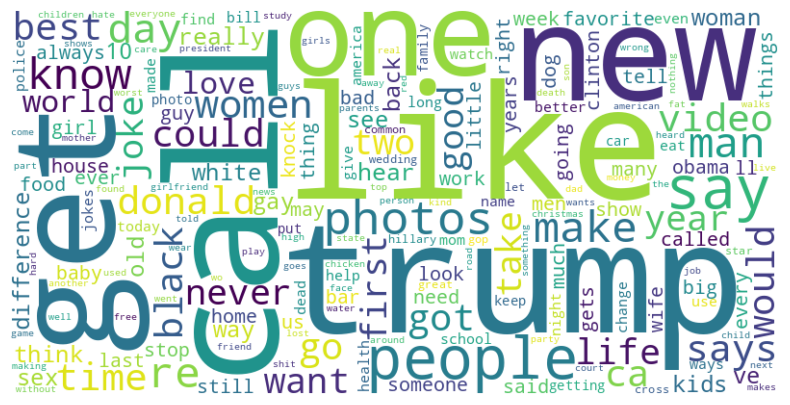

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Word_freqz)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##**First the text will be converted using TF-IDF and train a logistic regression model **

In [ ]:
data['text']=data['text'].str.lower()

In [ ]:
data['humor'].value_counts()

humor
False    100000
True     100000
Name: count, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vectorizer=TfidfVectorizer(max_features=1000)
X=vectorizer.fit_transform(data['text']).toarray()
Y=np.where(data['humor']==True,1,0)
Y

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:

X_train , X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
acc=accuracy_score(y_test,y_pred)
acc

0.8997

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     20001
           1       0.90      0.90      0.90     19999

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000



##** Next the text will be converted using word2vec and a train a logistic regression model

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [ ]:
def preprocess(text):
  text=text.lower()
  tokens=word_tokenize(text)
  return tokens

In [ ]:
data['tokens']=data['text'].apply(preprocess)

In [ ]:
data.head()

,text,humor,tokens
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,"[joe, biden, rules, out, 2020, bid, :, 'guys, ..."
1,Watch: darvish gave hitter whiplash with slow ...,False,"[watch, :, darvish, gave, hitter, whiplash, wi..."
2,What do you call a turtle without its shell? d...,True,"[what, do, you, call, a, turtle, without, its,..."
3,5 reasons the 2016 election feels so personal,False,"[5, reasons, the, 2016, election, feels, so, p..."
4,"Pasco police shot mexican migrant from behind,...",False,"[pasco, police, shot, mexican, migrant, from, ..."


In [ ]:
data_temp=pd.DataFrame(data.head(1))

In [ ]:
word2vec_model=Word2Vec(sentences=data['tokens'],vector_size=100, min_count=1, workers=4, window=5)

In [ ]:
word2vec_model.wv.most_similar('biden')

[('jeff', 0.9000622034072876),
 ('rudy', 0.8973350524902344),
 ('arpaio', 0.8862675428390503),
 ('marco', 0.8721207976341248),
 ('seth', 0.870284378528595),
 ('kellyanne', 0.8687353730201721),
 ('joe', 0.8669164180755615),
 ('rubio', 0.8664900064468384),
 ('conway', 0.8646723031997681),
 ('rick', 0.8607625365257263)]

In [ ]:
import numpy as np
def get_vector(text, model):
  vector=[model.wv[word] for word in text if word in model.wv]
    #there can be different number of vectors associated with each row.
    #take a mean vector used to convert a list of word vectors into a single fixed-size vector representation for entire data
  return np.mean(vector,axis=0) if vector else np.zeros(model.vector_size)



In [ ]:
data['text_vec']=data['tokens'].apply(lambda x: get_vector(x,word2vec_model))

In [ ]:
data_temp.head()

,text,humor,tokens,text_vec
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,"[joe, biden, rules, out, 2020, bid, :, 'guys, ...","[[-0.009500527, 0.009563287, -0.007770983, -0...."


In [ ]:
X=np.stack(data['text_vec'].values)
Y=np.where(data['humor']==True,1,0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 5: Train the logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
acc=accuracy_score(y_test,y_pred)
acc

0.94955

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     20001
           1       0.95      0.95      0.95     19999

    accuracy                           0.95     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.95      0.95      0.95     40000



#Conclusion: Converting data using Word2Vec increases the accuracy